In [3]:
from google.colab import files
import pandas as pd
import io

# ✅ Upload file manually (no arguments)
uploaded = files.upload()

Saving insurance_policies_data.xlsx to insurance_policies_data.xlsx


In [4]:
df = pd.read_excel(io.BytesIO(uploaded['insurance_policies_data.xlsx']))
df.head()

,ID,BirthDate,Car Color,Car Make,Car Model,Car Use,Car Year,Coverage Zone,Education,Gender,Marital Status,Parent,Claim Amount,Claim Freq,Household Income,Kids Driving
0,62-2999778,1965-08-09,Green,Acura,TSX,Private,2017,Highly Urban,High School,Male,Single,Yes,7375.988,1,220436.66,2
1,70-2426103,1991-04-21,Turquoise,Corbin,Sparrow,Private,2011,Urban,Bachelors,Female,Married,No,7897.541,1,66491.43,0
2,08-3808219,2002-03-08,Orange,Nissan,Pathfinder,Private,2000,Rural,Bachelors,Male,Divorced,No,3090.401,0,56122.70,0
3,38-0306843,1962-05-10,Pink,Ford,Econoline E350,Private,2007,Highly Urban,Bachelors,Female,Single,No,3025.782,1,175182.61,0
4,47-5163637,1995-01-15,Green,Nissan,350Z,Commercial,2013,Rural,Masters,Male,Single,No,5043.402,3,137110.23,0


Overview of the Data

In [5]:
df.info()

#  statistical summary
df.describe().T

# Preview unique values for categorical columns
df.select_dtypes('object').nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37542 entries, 0 to 37541
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                37542 non-null  object        
 1   BirthDate         37542 non-null  datetime64[ns]
 2   Car Color         37542 non-null  object        
 3   Car Make          37542 non-null  object        
 4   Car Model         37542 non-null  object        
 5   Car Use           37542 non-null  object        
 6   Car Year          37542 non-null  int64         
 7   Coverage Zone     37542 non-null  object        
 8   Education         37542 non-null  object        
 9   Gender            37542 non-null  object        
 10  Marital Status    37542 non-null  object        
 11  Parent            37542 non-null  object        
 12  Claim Amount      37542 non-null  float64       
 13  Claim Freq        37542 non-null  int64         
 14  Household Income  3754

,0
ID,37541
Car Color,19
Car Make,78
Car Model,1011
Car Use,2
Coverage Zone,5
Education,4
Gender,2
Marital Status,4
Parent,2


Missing Values Check

In [7]:
# Check missing values
df.isnull().sum()

# % of missing values
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)


,0
ID,0.0
BirthDate,0.0
Car Color,0.0
Car Make,0.0
Car Model,0.0
Car Use,0.0
Car Year,0.0
Coverage Zone,0.0
Education,0.0
Gender,0.0


Categorical vs Numerical Split

In [17]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns
print("Categorical:", cat_cols.tolist())
print("Numerical:", num_cols.tolist())


Categorical: ['Car Color', 'Car Make', 'Car Model', 'Car Use', 'Coverage Zone', 'Education', 'Gender', 'Marital Status', 'Parent']
Numerical: ['BirthDate', 'Car Year', 'Claim Amount', 'Claim Freq', 'Household Income', 'Kids Driving', 'Age']


Distribution of Claim Amount

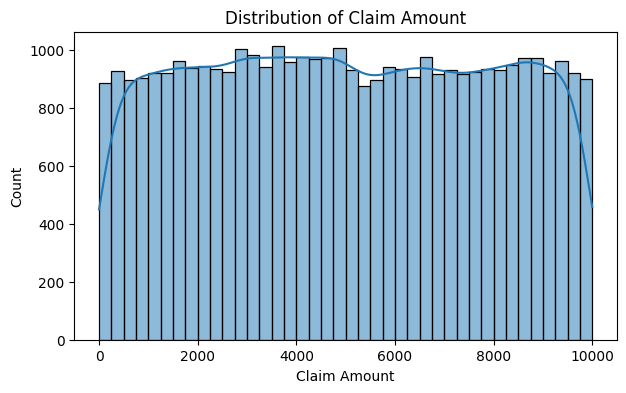

,Claim Amount
count,37542.000000
mean,5002.851410
std,2870.651799
min,0.004000
25%,2543.940750
50%,4945.589000
75%,7497.492750
max,9999.770000


In [18]:
plt.figure(figsize=(7,4))
sns.histplot(df['Claim Amount'], bins=40, kde=True)
plt.title("Distribution of Claim Amount")
plt.show()

df['Claim Amount'].describe()


Claim Frequency by Zone

In [20]:
# ✅ Claim Frequency & Average Claim by Coverage Zone
zone_claim = (
    df.groupby('Coverage Zone')['Claim Amount']
      .agg(['count', 'mean', 'sum'])
      .sort_values(by='mean', ascending=False)
)

zone_claim['claim_freq'] = zone_claim['count'] / len(df)
zone_claim = zone_claim.round(2)

print(zone_claim)



               count     mean          sum  claim_freq
Coverage Zone                                         
Urban           7588  5037.77  38226621.82         0.2
Suburban        7466  5012.48  37423207.92         0.2
Highly Rural    7452  4999.81  37258608.10         0.2
Highly Urban    7514  4986.10  37465582.95         0.2
Rural           7522  4977.80  37443026.83         0.2


Commercial vs private vehicles comparison

In [22]:
veh_type = df.groupby('Car Use')['Claim Amount'].agg(['mean','count','sum'])
veh_type['percent_claim_value'] = 100 * veh_type['sum'] / df['Claim Amount'].sum()
veh_type


,mean,count,sum,percent_claim_value
Car Use,,,,
Commercial,5000.524787,7482,3.741393e+07,19.92041
Private,5003.430511,30060,1.504031e+08,80.07959


Age Grouping

In [23]:
df['Car Age'] = 2025 - df['Car Year']
bins = [0,5,10,15,25,40]
labels = ['0–5','5–10','10–15','15–25','25+']
df['Car_Age_Group'] = pd.cut(df['Car Age'], bins=bins, labels=labels)

df.groupby('Car_Age_Group')['Claim Amount'].mean()


/tmp/ipython-input-240931772.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Car_Age_Group')['Claim Amount'].mean()


,Claim Amount
Car_Age_Group,
0–5,5112.213727
5–10,4961.144107
10–15,5027.138147
15–25,5012.051694
25+,5020.300696


married & bachelor segment insights

In [24]:
demo = df.groupby(['Marital Status','Education'])['Claim Amount'].agg(['mean','count','sum']).sort_values(by='mean', ascending=False)
demo


mean  count           sum
Marital Status Education                                    
Married        High School  5165.921237   1015  5.243410e+06
Divorced       Masters      5102.377847    911  4.648266e+06
               Bachelors    5048.501718   3275  1.653384e+07
Married        Bachelors    5047.466091   6161  3.109744e+07
               PhD          5045.452066    949  4.788134e+06
Single         Bachelors    5023.325119   7708  3.871979e+07
Married        Masters      5022.253267   1892  9.502103e+06
Divorced       PhD          5015.307608    464  2.327103e+06
Seperated      High School  4999.872595    704  3.519910e+06
Single         Masters      4999.751798   2387  1.193441e+07
Divorced       High School  4966.102376    577  2.865441e+06
Seperated      Masters      4943.607440    450  2.224623e+06
Single         High School  4933.214162   8143  4.017116e+07
Seperated      Bachelors    4925.631021   1557  7.669207e+06
Single         PhD          4886.681770   1117  5.458424e+06
Seperated      PhD          4800.790815    232  1.113783e+06

In [25]:
corr = df['Household Income'].corr(df['Claim Amount'])
print("Correlation between Income and Claim:", corr)


Correlation between Income and Claim: -0.004688919677770135


Kids Driving Impact

In [26]:
kids_stats = df.groupby('Kids Driving')['Claim Amount'].agg(['mean','count'])
kids_stats['claim_frequency'] = kids_stats['count']/len(df)
kids_stats


,mean,count,claim_frequency
Kids Driving,,,
0,5010.754184,26685,0.710804
1,4956.184299,6792,0.180917
2,4980.421882,3284,0.087475
3,5232.987191,781,0.020803


Top 10% Claim Concentration

In [27]:
threshold = df['Claim Amount'].quantile(0.90)
top10 = df[df['Claim Amount'] > threshold]
share = 100 * top10['Claim Amount'].sum() / df['Claim Amount'].sum()
print(f"Top 10% claimants contribute {share:.2f}% of total claim value")


Top 10% claimants contribute 18.97% of total claim value


Correlation Heatmap

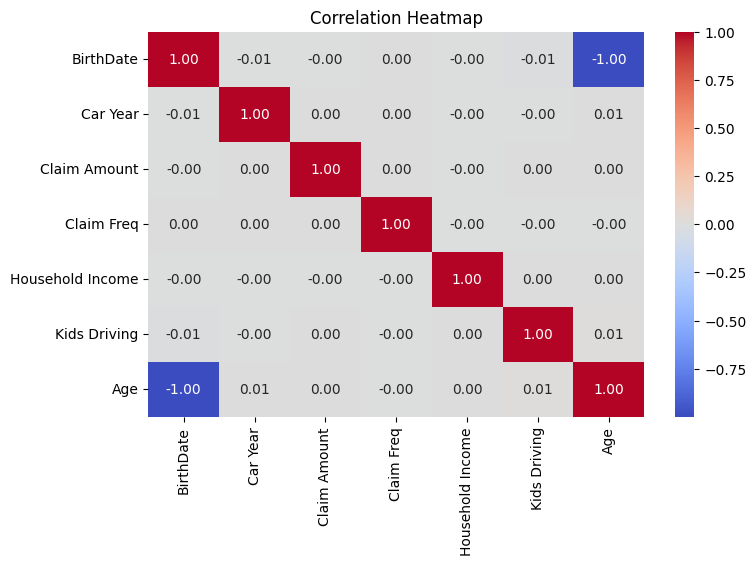

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Metrics Table

In [29]:
summary = pd.DataFrame({
    "Zone": zone_claim.index,
    "Avg_Claim": zone_claim["mean"].round(2),
    "Claim_Freq": (zone_claim["claim_freq"]*100).round(1)
})
summary


,Zone,Avg_Claim,Claim_Freq
Coverage Zone,,,
Urban,Urban,5037.77,20.0
Suburban,Suburban,5012.48,20.0
Highly Rural,Highly Rural,4999.81,20.0
Highly Urban,Highly Urban,4986.10,20.0
Rural,Rural,4977.80,20.0
